In [1]:
%matplotlib inline
import pandas as pd
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np
import math
import glob
import numba
from matplotlib.colors import LogNorm
import uproot_methods
from tqdm.auto import tqdm

from utils import set_plotting_style, get_chunking, get_chunking_dask

In [2]:
set_plotting_style()

In [3]:
try:
    from yahist import Hist1D, Hist2D
except:
    !pip install git+git://github.com/aminnj/yahist.git#egg=yahist -U
    from yahist import Hist1D, Hist2D

In [94]:
def get_eff(t):
    den = t["pass_fiducialgen_norho"].array() # doesn't require gen rho < 11cm
#     den = t["pass_fiducialgen"].array()
    num = t["pass_l1"].array() & t["pass_skim"].array()
    eff = (num & den).sum() / den.sum()
    return eff

In [95]:
# dfs = []
effs = []
fnames = glob.glob("/hadoop/cms/store/user/namin/ProjectMetis/HToZdZdTo2Mu2X_params_mzd*_ctau*mm_BABY_v5/output_1.root")
for fname in tqdm(fnames):
    mzd = int(fname.split("_mzd")[1].split("_")[0])
    ctau = int(fname.split("_ctau")[1].split("mm")[0])
    t = uproot.open(fname)["Events"]
    effs.append(dict(mzd=mzd,ctau=ctau,eff=get_eff(t),nevents=len(t)))
df = pd.DataFrame(effs)
#     df = pd.DataFrame()
#     df["mass"] = t["LeadingPair_mass"].array()
#     df["mzd"] = mzd
#     df["ctau"] = ctau
#     dfs.append(df)
#     break
# df = pd.concat(dfs)
# df

In [96]:
df.pivot_table(columns=["ctau"],values=["nevents"],index="mzd")

nevents                
ctau      10      25      50
mzd                         
5      99500   99500   99500
8     100000  100000  100000
10     99500   99500   99500
12     99500  100000  100000
15    100000  100000  100000
18    100000  100000   98000
20     99500   99000   98500
25    100000   99000   99000

Text(0.5, 1.0, 'efficiency')

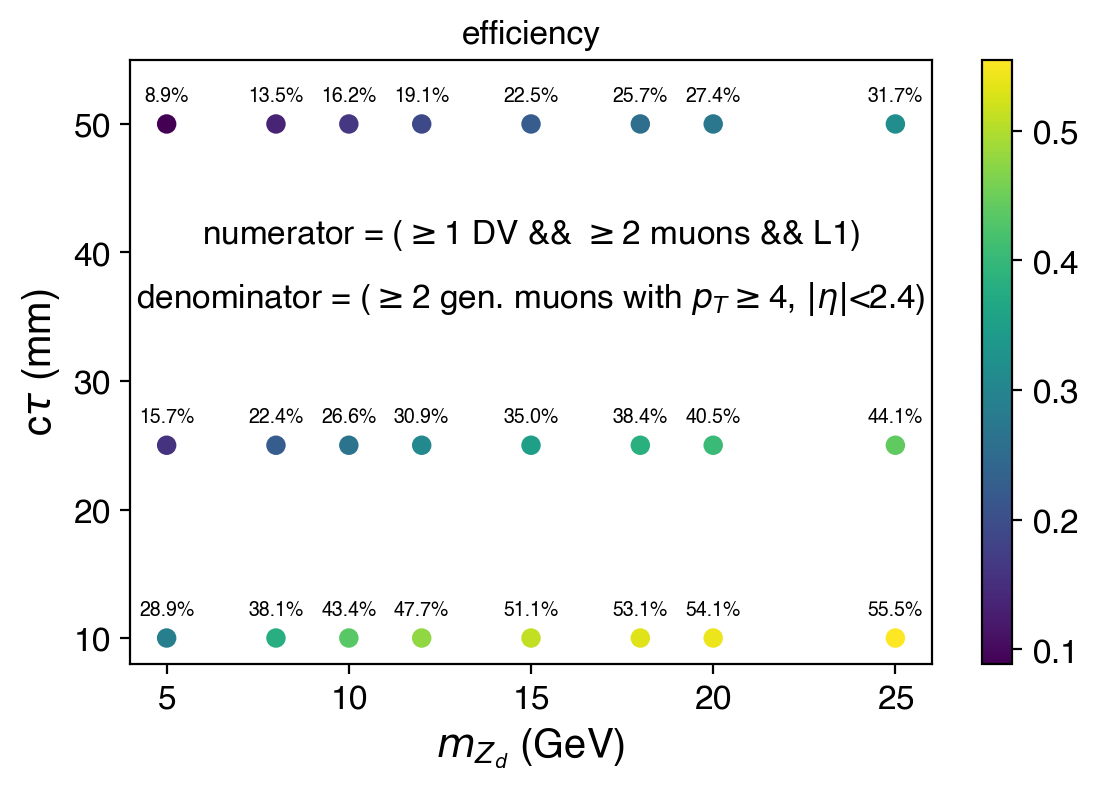

In [97]:
fig, ax = plt.subplots()
xs = df["mzd"]
ys = df["ctau"]
zs = df["eff"]
# zs = df["nevents"]
plt.scatter(x=xs,y=ys,c=zs,cmap="viridis")
plt.colorbar()
for i,(x,y,z) in enumerate(zip(xs,ys,zs)):
    s = "{:.1f}%".format(100*z)
#     s = "{:.1f}k".format(z/1000.)
    ax.text(x,y+1.5,s,fontsize=7,horizontalalignment="center",verticalalignment="bottom")
ax.set_xlim([4,26])
ax.set_ylim([8,55])
ax.set_xlabel(r"$m_{Z_d}$ (GeV)")
ax.set_ylabel(r"c$\tau$ (mm)")
ax.set_title("efficiency. numer.=(nDV>=1 && nMu>=2 && L1), denom.=(>=2 mu with pT>4, |eta|<2.4)")

ax.text(15,40,r"numerator = ($\geq$1 DV && $\geq$2 muons && L1)",fontsize=12,horizontalalignment="center",verticalalignment="bottom")
ax.text(15,35,r"denominator = ($\geq$2 gen. muons with $p_T\geq$4, $|\eta|$<2.4)",fontsize=12,horizontalalignment="center",verticalalignment="bottom")
ax.set_title("efficiency")

In [76]:
df.query("ctau==10").groupby("mzd")["mass"].plot.hist(bins=np.linspace(0,30,200),histtype="step")
ax = plt.gca()
ax.legend()

KeyError: 'Column not found: mass'